In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from filtering.utils import simulate as sim
from filtering.filtering import particle_filter as pf
from importlib import reload

In [3]:
reload(sim)

<module 'filtering.utils.simulate' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/utils/simulate.py'>

In [4]:
S0 = 100
mu = 0.02
kappa = 3.5 # mean reversion rate
theta = 0.05
sigma = 0.1308
nu = 0.0726
eta = 4 # long-term rate of change
lda = 8 # time change vol

T = 1
N = 200
dt = T/N

In [5]:
vgsa_params = [mu, kappa, theta, sigma, nu, eta, lda]

In [12]:
y, jumps = sim.simulate_vgsa(vgsa_params, S0, N=N, dt=dt)

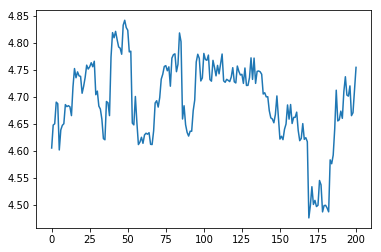

In [13]:
plt.plot(y)
plt.show()

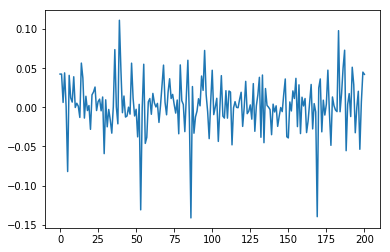

In [14]:
plt.plot(jumps)
plt.show()

In [15]:
reload(pf)

<module 'filtering.filtering.particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/particle_filter.py'>

In [18]:
num_particles = 2000
pf_vgsa = pf.PFVGSA(N=num_particles, dt=dt)

In [19]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

In [20]:
mu_ = (0.01, 0.05)
kappa_ = (2, 4) # mean reversion rate
theta_ = (0.01, 0.1)
sigma_ = (0.1, 0.2)
nu_ = (0.02, 0.1)
eta_ = (3,6) # long-term rate of change
lda_ = (6,10) # time change vol

In [21]:
vgsa_params_bounds = [mu_, kappa_, theta_, sigma_, nu_, eta_, lda_]

### Filtering by using arrival rate as (hidden) state

In [23]:
log_return = y[1:]/y[:-1]

In [24]:
arrivals, param_steps = pf_vgsa.filter_arrival(log_return, vgsa_params_bounds, is_bounds=True)

resampling since: 1.0282096776284617
num neg. arrival rate: 3
resampling since: 1.0075647645715782
num neg. arrival rate: 205
resampling since: 7.471197039227359
num neg. arrival rate: 169
resampling since: 17.012760401399127
num neg. arrival rate: 145
resampling since: 38.29901583351769
num neg. arrival rate: 113
resampling since: 62.35881431860127
num neg. arrival rate: 202
resampling since: 17.478718833785493
num neg. arrival rate: 116
resampling since: 32.09185069244631
num neg. arrival rate: 143
resampling since: 5.621268559285101
num neg. arrival rate: 107
resampling since: 28.58575675659637
num neg. arrival rate: 190
resampling since: 1.074742324518976
num neg. arrival rate: 5
resampling since: 910.156949459126
num neg. arrival rate: 398
resampling since: 2.0242293298551846
num neg. arrival rate: 44
resampling since: 106.33330437040587
num neg. arrival rate: 325
resampling since: 25.77261117613959
num neg. arrival rate: 103
resampling since: 15.233218180222556
num neg. arrival r

resampling since: 47.98137242399285
num neg. arrival rate: 230
resampling since: 18.139103279063967
num neg. arrival rate: 107
resampling since: 12.091180301612269
num neg. arrival rate: 120
resampling since: 37.417884196939426
num neg. arrival rate: 171
resampling since: 36.97591422246834
num neg. arrival rate: 141
resampling since: 11.193734843897301
num neg. arrival rate: 135
resampling since: 69.90740310724179
num neg. arrival rate: 203
resampling since: 15.15806076088175
num neg. arrival rate: 100
resampling since: 26.54267381468089
num neg. arrival rate: 140
resampling since: 10.758856714004432
num neg. arrival rate: 157
resampling since: 45.6785208741209
num neg. arrival rate: 151
resampling since: 68.48125489445815
num neg. arrival rate: 132
resampling since: 28.73053558465326
num neg. arrival rate: 168
resampling since: 70.85619232086772
num neg. arrival rate: 177
resampling since: 9.459910884292707
num neg. arrival rate: 91
resampling since: 19.78245272344603
num neg. arrival

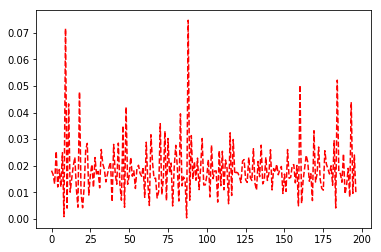

In [25]:
plt.plot(arrivals[3:], 'r--')
# plt.plot(vol, 'b--')
plt.show()

In [26]:
vgsa_params

[0.02, 3.5, 0.05, 0.1308, 0.0726, 4, 8]

# Plot parameter convergence

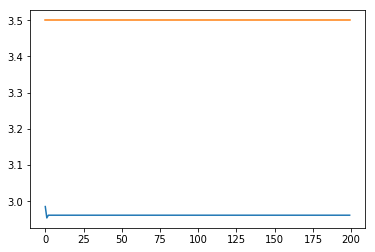

In [27]:
plt.plot(param_steps[1])
plt.plot(np.ones(len(param_steps[1]))*vgsa_params[1])
plt.show()

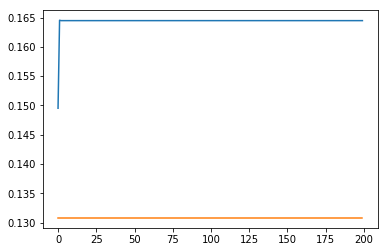

In [28]:
plt.plot(param_steps[3])
plt.plot(np.ones(len(param_steps[3]))*vgsa_params[3])
plt.show()